# Quiz 6 - Object Recognition: BoF vs ConvNets
#### Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Instructions ###

Implement SfM of Tomasi and Kanade
  * Use Harris + Cross correlation
  * Use ORB keypoint + ORB descriptor
  * Compute R and S following the algorithm in slides
  * Show the point cloud and camera orientation
  * Compute matrix Q and recompute R and S

Submit a notebook presenting both point cloud and camera orientation for the following configurations:
  * Harris + Cross correlation
  * ORB keypoint + descriptor

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

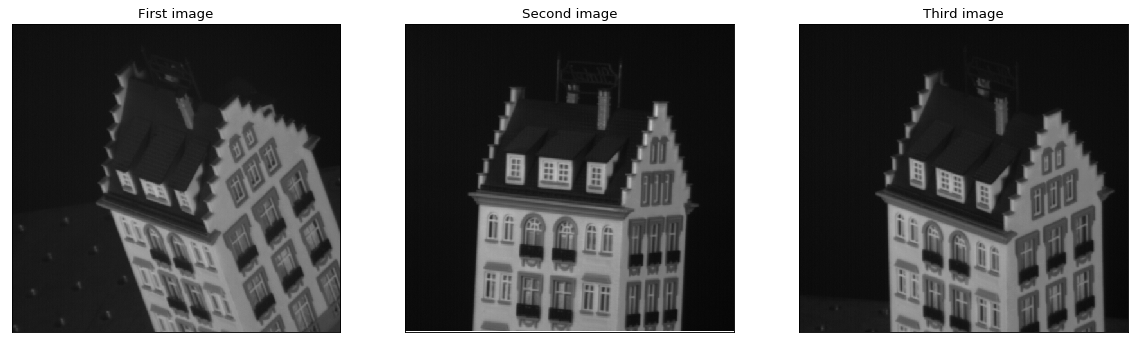

In [2]:
images = []
for image in os.listdir('./sfm_quiz7_images/'):
    images.append(cv2.imread('./sfm_quiz7_images/'+image))

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(images[0])
plt.title('First image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(images[1])
plt.title('Second image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(images[2])
plt.title('Third image'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
####using harris
dst1 = cv2.cornerHarris(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY),2,3,0.04)
dst2 = cv2.cornerHarris(cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY),2,3,0.04)
dst3 = cv2.cornerHarris(cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY),2,3,0.04)

####using orb
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(images[0],None)
kp2, des2 = orb.detectAndCompute(images[1],None)
kp3, des3 = orb.detectAndCompute(images[2],None)


In [4]:
def normalize_kps(kp):
    x, y = 0, 0
    normalized_kps = []
    for i in range(len(kp)):
        x, y = x + kp[i].pt[0], y + kp[i].pt[1]
    x, y = x/len(kp), y/len(kp) 
    for i in range(len(kp)):
        normalized_kps.append((kp[i].pt[0] - x,kp[i].pt[1] - y))
    return normalized_kps
    
normalized_kp1 = np.array(normalize_kps(kp1))
normalized_kp2 = np.array(normalize_kps(kp2))
normalized_kp3 = np.array(normalize_kps(kp3))

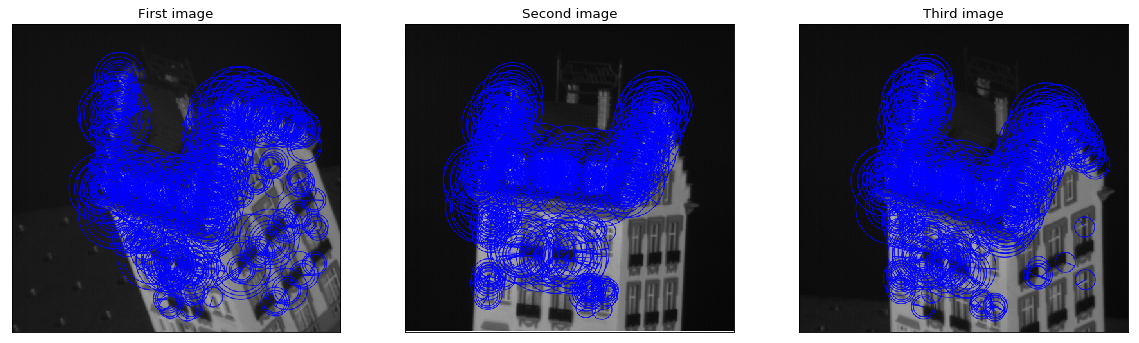

In [5]:
img_kp1 = cv2.drawKeypoints(images[0], kp1, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp2 = cv2.drawKeypoints(images[1], kp2, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp3 = cv2.drawKeypoints(images[2], kp3, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(img_kp1)
plt.title('First image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_kp2)
plt.title('Second image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_kp3)
plt.title('Third image'), plt.xticks([]), plt.yticks([])
plt.show()

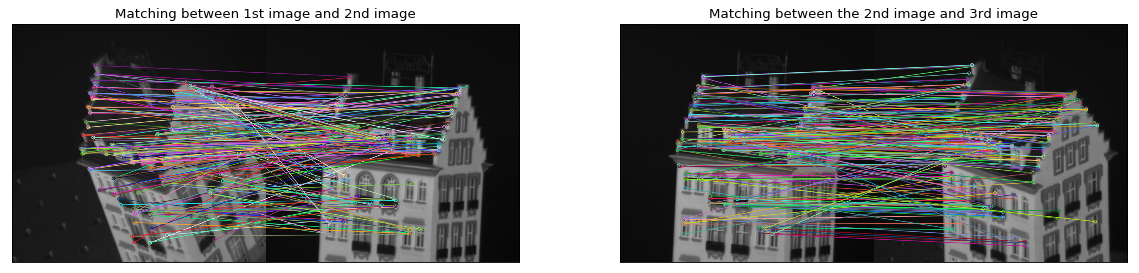

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches1 = bf.match(des1,des2)
# Sort them in the order of their distance.
matches1 = sorted(matches1, key = lambda x:x.distance)
# Draw first 10 matches.
img1 = cv2.drawMatches(images[0],kp1,images[1],kp2,matches1,None,flags=2)

matches2 = bf.match(des2,des3)
# Sort them in the order of their distance.
matches2 = sorted(matches2, key = lambda x:x.distance)
# Draw first 10 matches.
img2 = cv2.drawMatches(images[1],kp2,images[2],kp3,matches2,None,flags=2)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121),plt.imshow(img1)
plt.title('Matching between 1st image and 2nd image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Matching between the 2nd image and 3rd image'), plt.xticks([]), plt.yticks([])
plt.show()

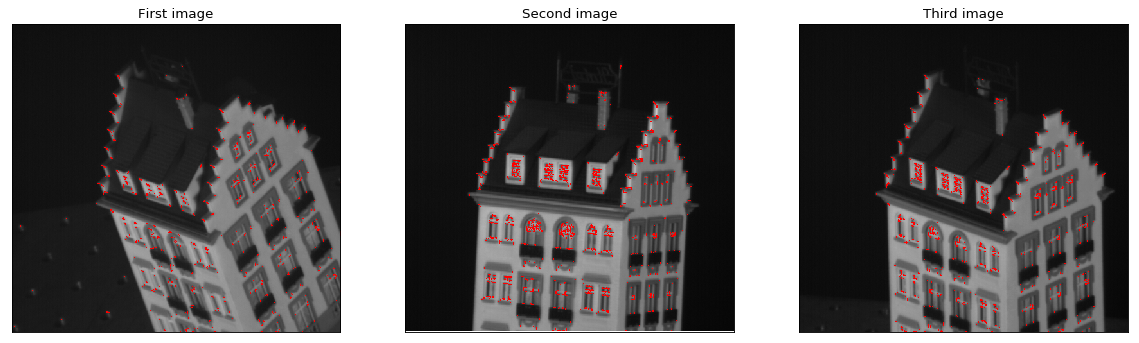

In [7]:
imgcorners3 = images[2].copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners3[dst3>0.01*dst3.max()]=[0,0,255]
imgcorners3 = cv2.cvtColor(imgcorners3, cv2.COLOR_BGR2RGB)
imgcorners2 = images[1].copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners2[dst2>0.01*dst2.max()]=[0,0,255]
imgcorners2 = cv2.cvtColor(imgcorners2, cv2.COLOR_BGR2RGB)
imgcorners1 = images[0].copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners1[dst1>0.01*dst1.max()]=[0,0,255]
imgcorners1 = cv2.cvtColor(imgcorners1, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(imgcorners1)
plt.title('First image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgcorners2)
plt.title('Second image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(imgcorners3)
plt.title('Third image'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
W = []
for match in matches1:
    for m in matches2:
        if match.queryIdx == m.trainIdx:
            column = [kp1[match.trainIdx].pt[0],kp2[match.queryIdx].pt[0],kp3[m.queryIdx].pt[0],
                    kp1[match.trainIdx].pt[1],kp2[match.queryIdx].pt[1],kp3[m.queryIdx].pt[1]]
#             column = [normalized_kp1[match.trainIdx][0],normalized_kp2[match.queryIdx][0],normalized_kp3[m.queryIdx][0],
#                      normalized_kp1[match.trainIdx][1],normalized_kp2[match.queryIdx][1],normalized_kp3[m.queryIdx][1]]
            W.append(column)
W = np.array(W)
W = np.transpose(W)
W.shape

(6, 127)

In [9]:
U, D, V = np.linalg.svd(W, full_matrices=True)
U_3 = U[:,0:3]
V_3 = V[0:3,:]
D_3 = np.eye(3)*D[0:3]
D_3_12 = np.abs(np.sqrt(D_3))

In [10]:
R = np.dot(U_3,D_3_12)
S = np.dot(D_3_12,V_3)

In [11]:
print(R.shape,S.shape)
print(R)
print(S[0].shape,S[1].shape,S[2].shape)

(6, 3) (3, 127)
[[-39.72747282  16.92273619   2.91172917]
 [-31.20083165  11.98918713  -4.54252302]
 [-34.43675212   7.9035493   -1.5566968 ]
 [-34.66301146 -22.42782777  -7.61744894]
 [-33.87771989  -9.83440335  25.79449775]
 [-33.15082135  -6.27313286 -15.99214112]]
(127,) (127,) (127,)


Point Cloud with Ŝ


<IPython.core.display.Javascript object>


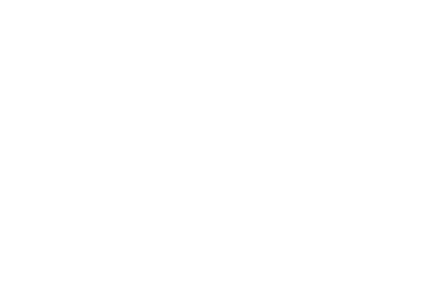

<IPython.core.display.Javascript object>


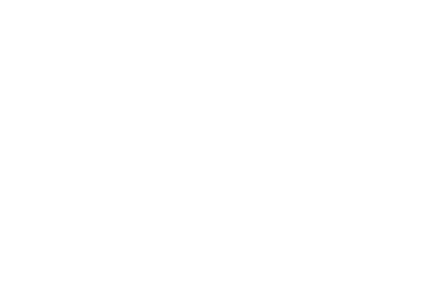

In [12]:
# R
# point_cloud_1 = []
# for i in range(len(images)):
#     for x in range(images[i].shape[0]):
#         for y in range(images[i].shape[1]):
#             z = x*R[i][0]
print("Point Cloud with Ŝ")
from mpl_toolkits import mplot3d
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(S[0], S[1], S[2], c=S[2]);

In [13]:
print("Camera Motion ~R")


Camera Motion ~R


In [14]:
%matplotlib inline
def g_line(a,b):
    return [a[0]*b[0],a[0]*b[1]+a[1]*b[0],a[0]*b[2]+a[2]*b[0],a[1]*b[1],a[1]*b[2]+a[2]*b[1],a[2]*b[2]]
G = []
for i in range(3):
    G.append(g_line(R[i],R[i]))
for j in range(3):
    G.append(g_line(R[j+3],R[j+3]))
for i in range(3):
    G.append(g_line(R[i],R[i+3]))

c = np.array([1,1,1,1,1,1,0,0,0])

In [15]:
l = np.dot(np.linalg.pinv(G),c)
L = np.zeros((3,3))
L[0][0] = l[0]
L[0][1] = l[1]
L[0][2] = l[2]
L[1][0] = l[1]
L[1][1] = l[3]
L[1][2] = l[4]
L[2][0] = l[2]
L[2][1] = l[4]
L[2][2] = l[5]
print(L)

[[ 0.00035573 -0.00021222  0.00016641]
 [-0.00021222  0.00129726  0.00015486]
 [ 0.00016641  0.00015486  0.00148773]]


In [16]:
U,D,UT = np.linalg.cholesky(L)
U = np.reshape(U,(3,1))
D = np.reshape(D,(3,1))
# print(U.shape,D.shape,UT.shape)
D[np.where(D<0)] = 0.01
# print (U)
# print(U[1][0])
# print('----')
# print(D)
# print('----')
# print(UT)
U_f = np.eye(3)
# U_f[1][0] = U[0][0]
# U_f[2][0] = U[1][0]
# U_f[2][1] = U[2][0]
U_f[1][0] = UT[0]
U_f[2][0] = UT[1]
U_f[2][1] = UT[2]

D_f = np.eye(3)
D_f[0][0] = D[0][0]
D_f[1][1] = D[1][0]
D_f[2][2] = D[2][0]

# print (U_f)
# # print(U[1][0])
# print('----')
# print(D_f)
Q = np.dot(U_f,np.sqrt(D_f))
print(Q)
Q1 = np.linalg.pinv(Q)

[[0.1        0.         0.        ]
 [0.00088231 0.18497239 0.        ]
 [0.00074279 0.00680817 0.        ]]


In [17]:
R_final = np.dot(R,Q)
S_final = np.dot(Q1,S)

In [18]:
print('R: ',R_final.shape,' S: ',S_final.shape)
print(R_final)
print('-----------')
print(S_final)

R:  (6, 3)  S:  (3, 127)
[[-3.95565344  3.15006246  0.        ]
 [-3.11287916  2.18674228  0.        ]
 [-3.43785815  1.45134012  0.        ]
 [-3.49174752 -4.20038974  0.        ]
 [-3.3772891  -1.64347967  0.        ]
 [-3.33249574 -1.26923361  0.        ]]
-----------
[[-85.64105571 -73.80859035 -69.44084874 -79.76362966 -68.65805643
  -82.55201063 -83.84570829 -72.95525793 -80.06169496 -82.80313391
  -66.57522214 -61.07952163 -77.48652209 -72.97654268 -60.94674621
  -76.37487855 -75.49707837 -84.66581298 -78.24762393 -66.6410993
  -75.75976398 -64.88505096 -59.58120973 -65.56091807 -80.58602523
  -85.07618026 -65.84419748 -85.70943738 -85.68900676 -72.83333516
  -75.10907799 -74.91524014 -61.93612326 -85.31285417 -66.2713864
  -73.62979165 -74.4375515  -71.87411074 -79.96456786 -74.18100176
  -74.46724188 -75.22538751 -75.24367545 -62.34077652 -76.69587592
  -83.55093841 -79.89788606 -74.54543659 -74.90861151 -85.2507581
  -77.16258859 -71.26661577 -59.83710156 -67.40059857 -74.551

Point Cloud with Ŝ


<IPython.core.display.Javascript object>


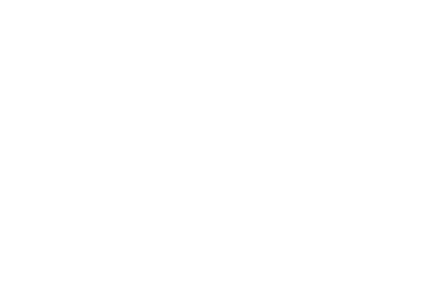

<IPython.core.display.Javascript object>


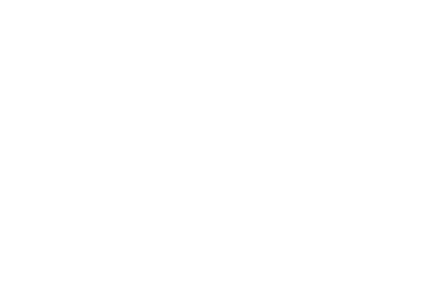

In [19]:
print("Point Cloud with Ŝ")
from mpl_toolkits import mplot3d
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(S_final[0], S_final[1], S_final[2], c=S_final[2]);

In [20]:
print('R: ',R.shape,' S: ',S.shape)
print(R)
print('-----------')
print(S)

R:  (6, 3)  S:  (3, 127)
[[-39.72747282  16.92273619   2.91172917]
 [-31.20083165  11.98918713  -4.54252302]
 [-34.43675212   7.9035493   -1.5566968 ]
 [-34.66301146 -22.42782777  -7.61744894]
 [-33.87771989  -9.83440335  25.79449775]
 [-33.15082135  -6.27313286 -15.99214112]]
-----------
[[-8.57949820e+00 -7.37818756e+00 -6.92268110e+00 -7.95696019e+00
  -6.86438482e+00 -8.25416836e+00 -8.39867158e+00 -7.28991105e+00
  -7.99797139e+00 -8.31755032e+00 -6.70044393e+00 -6.12697946e+00
  -7.74389066e+00 -7.30777041e+00 -6.09142632e+00 -7.62188259e+00
  -7.57014025e+00 -8.49872504e+00 -7.82817017e+00 -6.71867048e+00
  -7.61480925e+00 -6.47973240e+00 -6.00201950e+00 -6.54183174e+00
  -8.02960583e+00 -8.49363702e+00 -6.62449931e+00 -8.54719646e+00
  -8.57435677e+00 -7.29251803e+00 -7.49131519e+00 -7.50302316e+00
  -6.21626862e+00 -8.49862390e+00 -6.61457691e+00 -7.36700535e+00
  -7.43213123e+00 -7.18092850e+00 -8.03077709e+00 -7.39302810e+00
  -7.44516545e+00 -7.51000836e+00 -7.50744317e+00 

In [21]:
print('Q: ',Q.shape,' Q_1: ',Q1.shape)
print(Q)
print(Q1)

Q:  (3, 3)  Q_1:  (3, 3)
[[0.1        0.         0.        ]
 [0.00088231 0.18497239 0.        ]
 [0.00074279 0.00680817 0.        ]]
[[ 9.99949616e+00 -2.61074270e-03  7.09317100e-02]
 [-4.91083931e-02  5.39891120e+00  1.98365799e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [22]:
print(matches[1].trainIdx,matches[1].queryIdx)
print(kp1[67].pt,kp2[175].pt)

NameError: name 'matches' is not defined

In [ ]:
a = cv2.circle(images[0].copy(),(int(kp1[362].pt[0]),int(kp1[362].pt[1])),10,(255,0,0),-1)
b = cv2.circle(images[1].copy(),(int(kp2[355].pt[0]),int(kp2[355].pt[1])),10,(255,0,0),-1)
plt.imshow(a),plt.show()

In [ ]:
plt.imshow(b),plt.show()

In [ ]:
len(matches)